## Chebyshev filter

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def chebyshev_filter(input_signal, N, rp, rs, cutoff_frequency, filter_type, fs):
    # Apply a Chebyshev Type I digital filter to the input signal.
    #
    # Parameters:
    # - input_signal: numpy array, input signal to filter
    # - N: int, the order of filter
    # - rp: float, passband ripple (dB)
    # - rs: float, stopband attenuation (dB)
    # - cutoff_frequency: float, cutoff frequency of the filter
    # - filter_type: str, type of the filter ('low', 'high', 'band', 'bandpass', 'bandstop')
    # - fs: float, sampling frequency
    #
    # Returns:
    # - output_signal: numpy array, filtered output signal
    # - b: numpy array, numerator coefficients of the filter
    # - a: numpy array, denominator coefficients of the filter

    nyquist = 0.5 * fs
    normalized_cutoff_frequency = cutoff_frequency / nyquist

    b, a = signal.cheby1(N=N, rp=rp, Wn=normalized_cutoff_frequency, btype=filter_type, analog=False, output='ba')
    output_signal = signal.lfilter(b, a, input_signal)

    return output_signal, b, a



# Define filter parameters
filter_type = 'low'  # тип фільтра - фільтр нижніх частот
Ap = 1               # рівень пульсації смуги пропускання - 1 Дб
Aa = 15              # рівень затухання в смузі затримки - 15 Дб
fp = 100             # гранична частота смуги пропускання - 100 Гц
fs = 1000            # частота дискритезації - 1 КГц
fa = 150             # гранична частота смуги затримки - 150 Гц

wa = np.tan(np.pi * fa / fs)/ np.tan(np.pi * fp/fs)
D = (np.power(10, Aa/10) - 1)/(np.power(10, Ap/10)-1)
N = np.floor(np.log10(4*D)/(2 * np.log10(wa + np.sqrt(wa**2 - 1))))

print('Filter order N = ', N)

Filter order N =  3.0


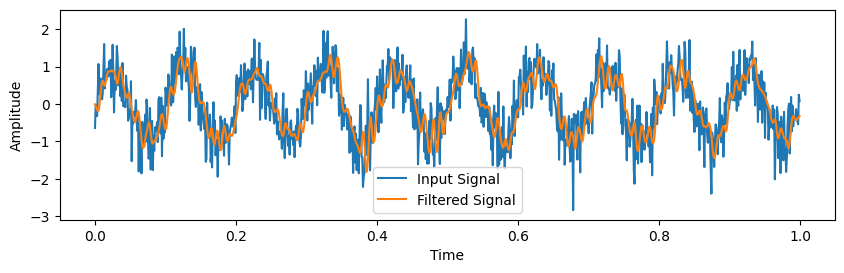

In [29]:
# Generate an example input signal (sine wave)
t = np.arange(0, 1, 1/fs)
input_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.normal(size=len(t))

# Apply the Chebyshev filter
output_signal, b, a = chebyshev_filter(input_signal, N, Ap, Aa, fp, filter_type, fs)


# Plot the input and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, output_signal, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

## Recieved Coefficients

In [30]:
# print recieved coefficients
print('b coefficients:')  # коефіцієнти чисельника (ваги для кожного входу)
print(b)

print()

print('a coefficients:') # коефіцієнти знаменника (характеристики затухання фільтра)
print(a)

b coefficients:
[0.01147466 0.03442397 0.03442397 0.01147466]

a coefficients:
[ 1.         -2.13778992  1.76934553 -0.53975836]


## Graphs

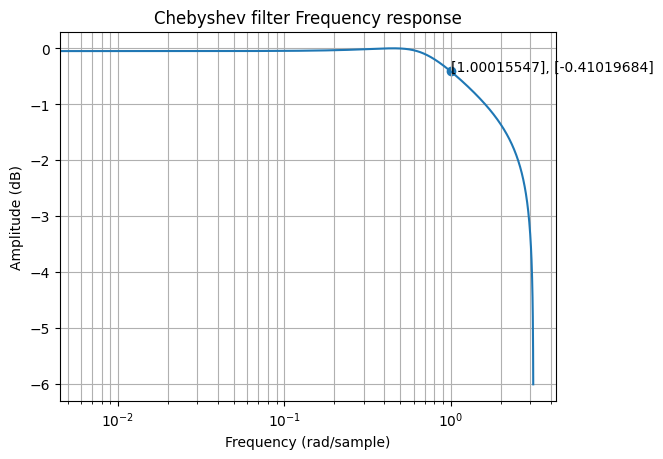

In [4]:
# calculate frequency response using freqz
w, h = signal.freqz(b, a)

pointX = 1.0
i = np.where(np.isclose(w, pointX, 0.001))
pointY = np.log10(abs(h[i]))
pointX = w[i]

# plot the frequency response
fig, ax1 = plt.subplots()
ax1.semilogx(w, np.log10(abs(h)))
ax1.set_title('Chebyshev filter Frequency response')
ax1.set_ylabel('Amplitude (dB)')
ax1.set_xlabel('Frequency (rad/sample)')
ax1.grid(which='both')

plt.scatter(pointX, pointY)
plt.text(pointX, pointY, "{pointX}, {pointY}".format(pointX=pointX, pointY=pointY))

plt.show()

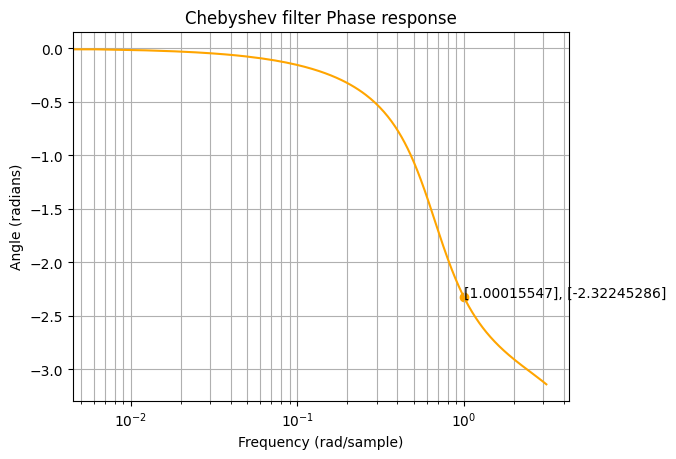

In [5]:
# calculate frequency response using freqz
w, h = signal.freqz(b, a)

pointX = 1.0
i = np.where(np.isclose(w, pointX, 0.001))
pointY = np.unwrap(np.angle(h))[i]
pointX = w[i]

# plot the frequency response
fig, ax1 = plt.subplots()
ax1.semilogx(w, np.unwrap(np.angle(h)), 'orange')
ax1.set_title('Chebyshev filter Phase response')
ax1.set_ylabel('Angle (radians)')
ax1.set_xlabel('Frequency (rad/sample)')
ax1.grid(which='both')

plt.scatter(pointX, pointY, c='orange')
plt.text(pointX, pointY, "{pointX}, {pointY}".format(pointX=pointX, pointY=pointY))

plt.show()

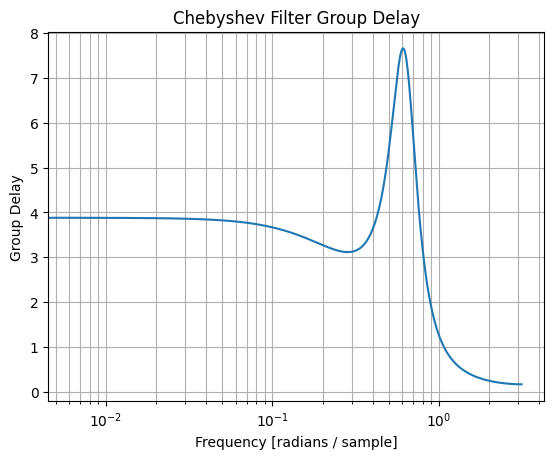

In [ ]:
# Calculate group delay
freq, group_delay = signal.group_delay((b, a))

# Plot group delay
plt.semilogx(freq, group_delay)
plt.title('Chebyshev Filter Group Delay')
plt.xlabel('Frequency [radians / sample]')
plt.ylabel('Group Delay')
plt.grid(which='both')
plt.show()

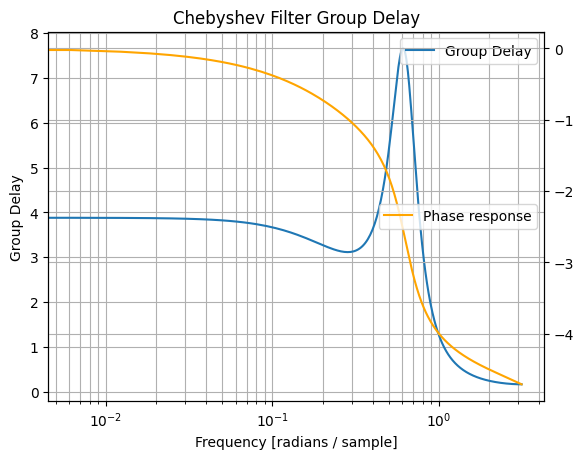

In [ ]:
# plot group delay
fig, ax1 = plt.subplots()
ax1.semilogx(freq, group_delay, label='Group Delay')
ax1.set_title('Chebyshev Filter Group Delay')
ax1.set_xlabel('Frequency [radians / sample]')
ax1.set_ylabel('Group Delay')
ax1.grid(which='both')
ax1.legend(loc='upper right')

# plot the frequency response
ax2 =ax1.twinx()
ax2.semilogx(w, np.unwrap(np.angle(h)), 'orange', label='Phase response')
ax2.grid(which='both')
ax2.legend(loc='center right')

plt.show()

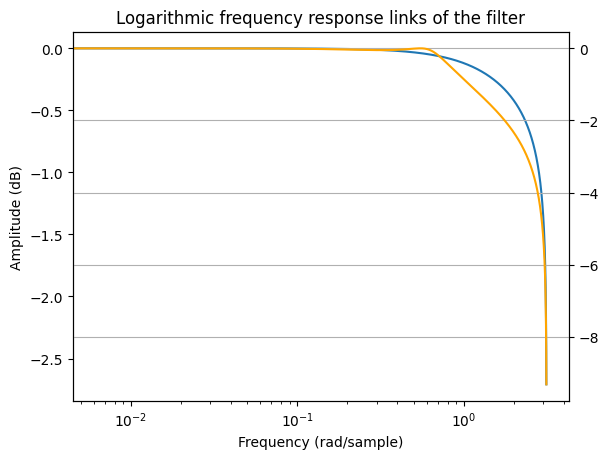

In [ ]:
output_signal0, b0, a0 = chebyshev_filter(input_signal, 1, Ap, Aa, fp, filter_type, fs)
output_signal, b, a = chebyshev_filter(input_signal, N, Ap, Aa, fp, filter_type, fs)

# calculate frequency response using freqz
w0, h0 = signal.freqz(b0, a0)
w, h = signal.freqz(b, a)

# plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Logarithmic frequency response links of the filter')
ax1.semilogx(w0, np.log10(abs(h0)))
ax1.set_ylabel('Amplitude (dB)')
ax1.set_xlabel('Frequency (rad/sample)')

ax2 = ax1.twinx()
ax2.semilogx(w, np.log10(abs(h)), color='orange')
plt.grid(which='both')
plt.show()

## IIR filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

def recursive_filter(input_signal, a_coefficients, b_coefficients):

    # apply a recursive digital filter (IIR) to the input signal.
    #
    # parameters:
    # - input_signal: input signal to filter
    # - a_coefficients: coefficients of the denominator part
    # - b_coefficients: coefficients of the numerator part
    #
    # returns filtered output signal

    order = max(len(a_coefficients), len(b_coefficients))
    input_length = len(input_signal)
    output_signal = np.zeros(input_length)

    # initial conditions
    x = np.zeros(order)
    y = np.zeros(order)

    # apply recursive filter
    for i in range(input_length):
        x[0] = input_signal[i]

        # calculate the output using the filter equation
        y[0] = b_coefficients[0] * x[0]
        for j in range(1, len(b_coefficients)):
            y[0] += b_coefficients[j] * x[j] - a_coefficients[j] * y[j]

        # update state variables for the next iteration
        for k in range(order - 1, 0, -1):
            x[k] = x[k - 1]
            y[k] = y[k - 1]

        output_signal[i] = y[0]

    return output_signal

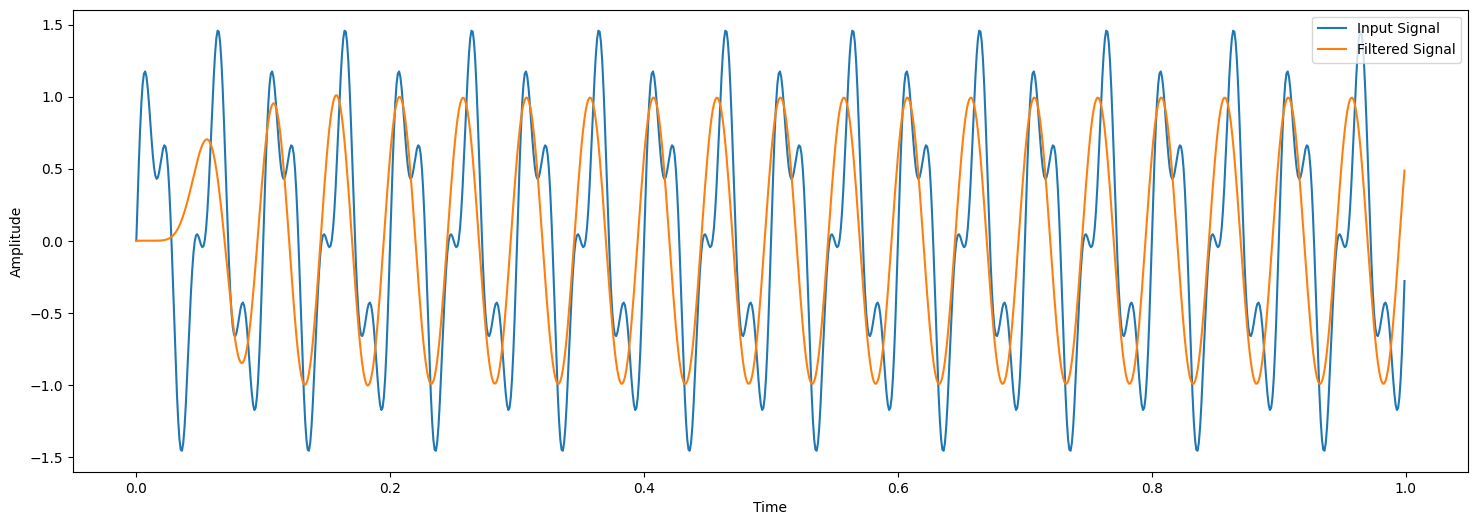

In [ ]:
# define filter coefficients (low-pass butterworth filter)
order = 10
cutoff_frequency = 0.05
b, a = scipy.signal.butter(order, cutoff_frequency, btype='low', analog=False)

# generate an example input signal (sine wave)
fs = 1000  # sampling frequency
t = np.arange(0, 1, 1/fs)
input_signal = np.sin(2 * np.pi * 20 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# apply the recursive filter
output_signal = recursive_filter(input_signal, a, b)

# plot the results
plt.figure(figsize=(18, 6))
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, output_signal, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

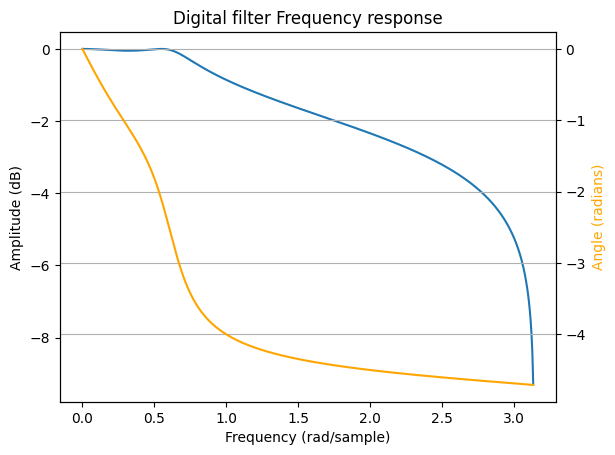

In [ ]:
# calculate frequency response using freqz
w, h = signal.freqz(b, a)

# plot the magnitude and phase response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter Frequency response')

ax1.plot(w, np.log10(abs(h)))
ax1.set_ylabel('Amplitude (dB)')
ax1.set_xlabel('Frequency (rad/sample)')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'orange')
ax2.set_ylabel('Angle (radians)', color='orange')
ax2.grid()
ax2.axis('tight')
plt.show()

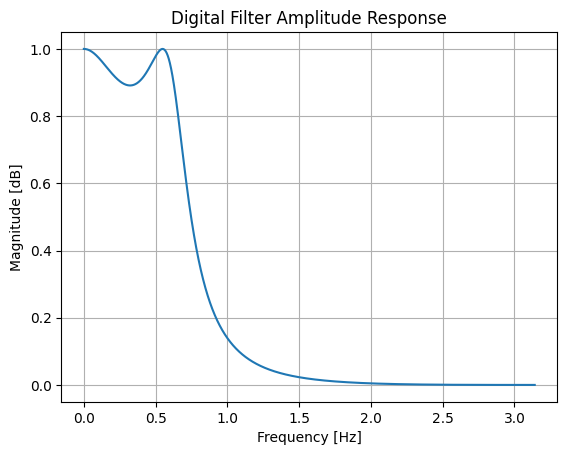

In [ ]:
# calculate frequency response using freqz
w, h = signal.freqz(b, a, worN=8000)

# plot the amplitude response
plt.plot(w, np.abs(h))
plt.title('Digital Filter Amplitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()